# Salary Assignment 3: Multivariate Regression

In the next series of challenges, we will predict employee salaries from different employee characteristics (or features).

In [1]:
# Import necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns

#set up a large font for our pyplot
font = {'family' : 'Arial',
        'weight' : 'bold',
        'size'   : 12}

plt.rc('font', **font)
plt.rcParams["figure.figsize"] = [14,9]

# Python's default exception mode is too verbose, let's set it to 'plain'
%xmode plain

Exception reporting mode: Plain


Import the data salary.csv to a Jupyter Notebook.

In [2]:
data = pd.read_csv("salary.csv")
data = data.drop(data.index[208]) # This row has a null value for the salary
data = data.sort_values('yearsworked')
data.reset_index(drop=True, inplace=True)
data.tail()

,salary,exprior,yearsworked,yearsrank,market,degree,otherqual,position,male,Field,yearsabs
508,53686.0,0,31,17,0.78,1,0,3,1,1,1
509,82508.0,0,32,23,0.93,0,1,3,1,2,0
510,72152.0,0,33,22,1.00,1,0,3,1,2,2
511,66334.0,0,35,23,0.78,1,0,3,1,1,0
512,64109.0,0,41,28,0.91,1,0,3,1,2,0


Use multiple linear regression to predict salary from all the variables in the dataset.

a)	Create scatterplots, histograms, and a descriptive statistics table of the variables of interest.

In [3]:
data.describe()

,salary,exprior,yearsworked,yearsrank,market,degree,otherqual,position,male,Field,yearsabs
count,513.000000,513.000000,513.000000,513.000000,513.000000,513.000000,513.000000,513.000000,513.000000,513.000000,513.000000
mean,50863.220098,2.931774,12.836257,7.046784,0.948558,0.964912,0.044834,2.130604,0.750487,2.526316,6.994152
std,12685.132358,4.794327,9.447040,6.419708,0.149524,0.184181,0.207142,0.819977,0.433153,1.126644,16.887552
min,29000.000000,0.000000,0.000000,0.000000,0.710000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
25%,40000.000000,0.000000,4.000000,2.000000,0.840000,1.000000,0.000000,1.000000,1.000000,2.000000,0.000000
50%,50096.000000,1.000000,12.000000,5.000000,0.920000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000
75%,60345.000000,4.000000,22.000000,12.000000,1.020000,1.000000,0.000000,3.000000,1.000000,4.000000,2.000000
max,96156.000000,25.000000,41.000000,28.000000,1.330000,1.000000,1.000000,3.000000,1.000000,4.000000,118.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D36DFE0828>,
      dtype=object)

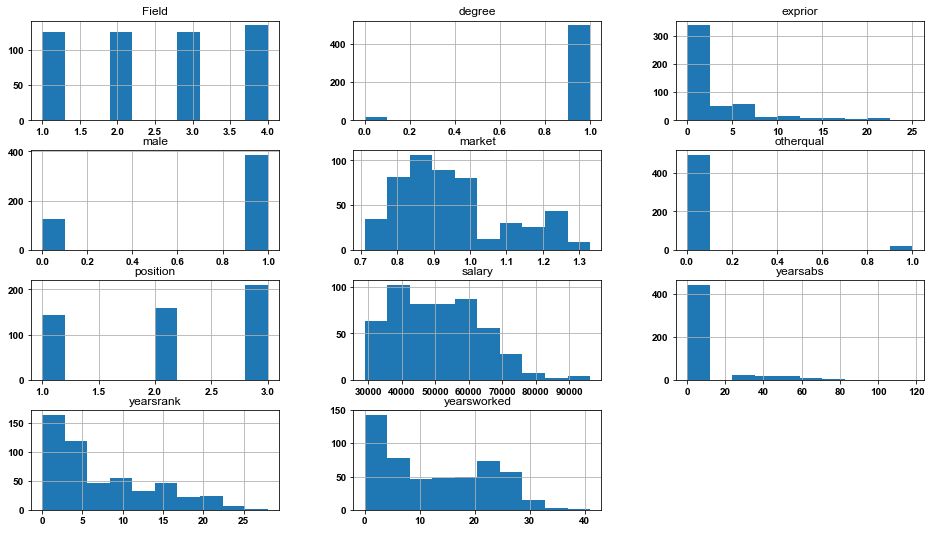

In [7]:
data.hist()

In [5]:
data.columns

Index(['salary', 'exprior', 'yearsworked', 'yearsrank', 'market', 'degree',
       'otherqual', 'position', 'male', 'Field', 'yearsabs'],
      dtype='object')

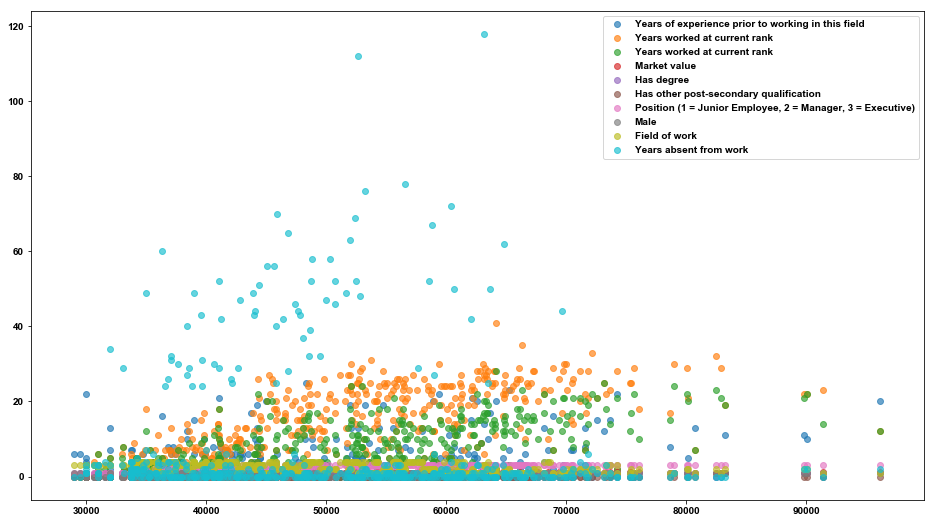

In [42]:
plt.rcParams["figure.figsize"] = [16,9]

outcome = "salary"
predictors = ['exprior', 'yearsworked', 'yearsrank', 'market', 'degree',
       'otherqual', 'position', 'male', 'Field', 'yearsabs']
predictor_labels = ['Years of experience prior to working in this field', 'Years worked at current rank', 
                    'Years worked at current rank ', 'Market value', 'Has degree', 'Has other post-secondary qualification', 
                    'Position (1 = Junior Employee, 2 = Manager, 3 = Executive)', 'Male', 'Field of work', 'Years absent from work']

fig, ax = plt.subplots()
for i, predictor in enumerate(predictors):
    ax.scatter(data[outcome], data[predictor], alpha=0.66, label=predictor_labels[i])
ax.legend()
plt.show()